In [44]:
import numpy as np
import seaborn as sb
import pandas as pd
import pandas.api.types as ptypes
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
#read csv file
train_df=pd.read_csv('train.csv')
train_df.sum()

x    38490.157369
y    34907.968550
dtype: float64

In [46]:
train_df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [47]:
train_df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [48]:
train_df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [49]:
train_df.columns

Index(['x', 'y'], dtype='object')

In [50]:
train_df.dtypes

x    float64
y    float64
dtype: object

In [51]:
train_df.isnull().sum()

x    0
y    1
dtype: int64

In [52]:
train_df.duplicated().sum()

0

In [53]:
train_df.corr()

,x,y
x,1.00000,0.99534
y,0.99534,1.00000


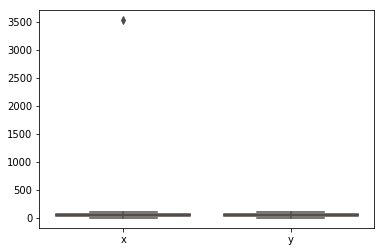

In [54]:
sb.boxplot(data=train_df,palette='autumn')


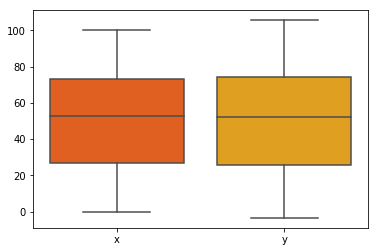

In [55]:
sb.boxplot(data=test_df,palette='autumn')

skewness:= 26.457513109730293
mean is:= 221880009852.39642 median is: 5764801.0
right skewed


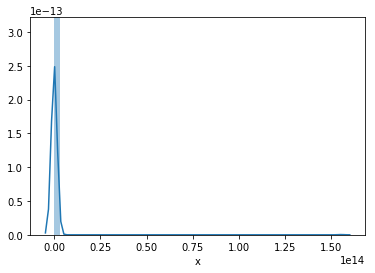

In [61]:
#find skewness
target=(np.square((train_df['x'])))
print("skewness:=",target.skew())
print("mean is:=",target.mean(),"median is:",target.median())
if target.mean()<target.median():
    print("left skewed")
elif target.mean()>target.median():
    print("right skewed")
else:
    print("no skewness")
sb.distplot(target)
train_df['x']=target

In [57]:
test_df=pd.read_csv('test.csv')
test_df.sum()

x    15281.000000
y    15361.515329
dtype: float64

In [58]:
import numpy as np
import pandas as pd

gradient decent for theta_0 0.03676954247709635
gradient decent for theta_1 0.9962444705152792
Accuracy: 86.07588147010489


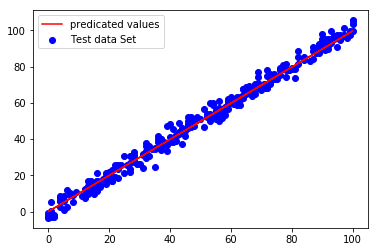

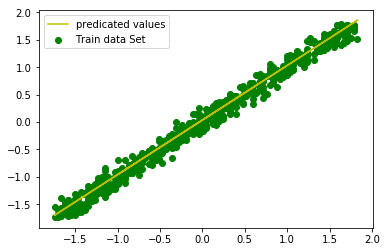

In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

class Linear_regression:
    
    def __init__(self):
        
        self.learning_rate=0.001
        self.theta_0=0.1
        self.theta_1=1
        self.epoch=1000
        
        
        
    # handling missing data
    def missing_data(self):
        train.replace(np.NaN,train.mean(),inplace=True)
        test.replace(np.NaN,test.mean(),inplace=True)
        return train,test 
    
    def remove_outliers(self,train_data):
        low=.05
        high=.95
        quantile_train_data=train_data.quantile([low,high])
        for name in list (train_data.columns):
            if ptypes.is_numeric_dtype(train_data[name]):
                train_data=train_data[(train_data[name]>quantile_train_data.loc[low,name])&(train_data[name]<quantile_train_data.loc[high,name])]
        return train_data
        

    
    # feature scaling
    def Feature_scaling(self,train_df):
        for Column in train_df.columns:
                train_df[Column]=(train_df[Column]-train_df[Column].mean())/np.std(train_df[Column])
        return train_df
    
    #gradient decent
    def gradient_decent(self,x_train_data,y_train_data):
        theta_0=self.theta_0
        theta_1=self.theta_1
        for iteration in range(self.epoch):
            cost=0
            h1=h2=0.0
            cost_temp=0.0
            
            for data in range(len(x_train_data)):
                #H(x) = theta_0 + theta_1*X(i)
                hypothesis =theta_0 +(theta_1 * x_train_data[data])

                # h1=theta_0+theta_1*x(i)-y(i)
                h1 +=(hypothesis-y_train_data[data])

                # h1=(theta_0+theta_1*x(i)-y(i))*x(i)
                h2 += ((hypothesis-y_train_data[data])*x_train_data[data])
                
                cost += hypothesis-y_train_data[data]
                
             # getting minimum cost function basic
            cost_temp += (hypothesis-y_train_data[data])**2
                      
            cost=(1/2*len(x_train_data))*cost_temp
                      
            theta_0=theta_0-((self.learning_rate*h1)/len(x_train_data))
             
            theta_1=theta_1-((self.learning_rate*h2)/len(x_train_data))
        return theta_0,theta_1
        
    #perform testing dataset
    def predict(self,x_test_data,theta_0,theta_1):
        y_predict=[0]*len(x_test_data)
        for i in range(len(x_test_data)):
            y_predict[i]=(theta_0+(theta_1*x_test_data[i]))
        return y_predict


    # calculating accurancy
    def accuracy(self,y_test_data,y_predict):
        diff=0
        for i in range(len(y_test_data)):
            diff +=abs((y_predict[i]-y_test_data[i])/y_test_data[i])
        diff=(diff/len(y_test_data))
        data_accuracy=1-diff
        return data_accuracy*100
    
    
    
           
def main():
    obj = Linear_regression()
    train,test=obj.missing_data()
    #print("missing train data",train)
    #print("missing test data:",test)
    
    
     # remove outliers
    train=obj.remove_outliers(train)
#     print("remove outliers data""\n",train)
    
    # feature scaling
    train_df = obj.Feature_scaling(train)
    #print("scaled train :",train)
    
   

    #seperate  the train data
    x_train_data=np.array(train['x'])
    y_train_data=np.array(train['y'])
    #print("train data""\n",train_data)

    #seperate the test data
    x_test_data=np.array(test['x'])
    y_test_data=np.array(test['y'])
    #print("test data:""\n",test_data)
    
    
    theta_0,theta_1=obj.gradient_decent(x_train_data,y_train_data)
    print("gradient decent for theta_0",theta_0)
    print("gradient decent for theta_1",theta_1)
    
#     #test data over train data
    y_predict_test = obj.predict(x_test_data,theta_0,theta_1)
#     y_predict_test=obj.test(x_test_data,theta_0,theta_1)
    y_predict_train=obj.predict(x_train_data,theta_0,theta_1)
#     print(y_predict_test)
    
#     get accuracy
    accuracy=obj.accuracy(y_test_data,y_predict_test)
    
#     display accuracy
    print("Accuracy:",accuracy)

# plotting test data on predication value
    plt.scatter(x_test_data,y_test_data,color='b',label='Test data Set')
    plt.plot(x_test_data,y_predict_test,color='r',label='predicated values')
    plt.legend()
    plt.show()
    
    # plotting train data on predication value
    plt.scatter(x_train_data,y_train_data,color='g',label='Train data Set')
    plt.plot(x_train_data,y_predict_train,color='y',label='predicated values')
    plt.legend()
    plt.show()
   
    

if __name__=='__main__':
    main()